<a href="https://colab.research.google.com/github/MirandaCarou/Quantum_Algorithims_Programming/blob/main/Deutsch-Jozsa_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **MIRANDA CAROU LAIÑO**

---



In [2]:
# Instalamos qiskit en el notebook
!pip install qiskit qiskit-aer pylatexenc

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 8.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 81.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 45.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.4/119.4 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 64.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.5/49.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 MB 16.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.5/108.5 kB 7.8 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=9ed493c17be8dd0179a6163b936d678ca6b1177cbdbda34671e3b57a3af957e4
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc


In [3]:
# importing Qiskit
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np
from math import sqrt
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

In [4]:
def obten_estado(qcirc, etiqueta="|\psi\!\!> = ", bloch=False):
    sim = AerSimulator(method='statevector')
    qc_obj = transpile(qcirc, sim)
    result = sim.run(qc_obj).result()
    estado = result.get_statevector()
    display(estado.draw('latex', prefix=etiqueta))
    if bloch:
      display(estado.draw('bloch'))

def obten_unitaria(qcirc, etiqueta):
    sim_u = AerSimulator(method='unitary')
    qc_obj = transpile(qcirc, sim_u)
    result = sim_u.run(qcirc).result()
    unitary = result.get_unitary(qcirc)
    display(unitary.draw('latex', prefix=etiqueta))

# Práctica 2: algoritmo de  Deutsch-Jozsa

Implementa en Qiskit el algoritmo de Deutsch-Jozsa para un $n$ arbitrario.
Es igual que el algoritmo Deutch pero para muchos n
Pasos:

1. Crea una función que devuelva un oráculo para $f$ constante.

In [78]:
def cte_oraculo(n):
    """
    Define un oraculo para una función constante de n bits
        return: circuito de n+1 cúbits en forma de puerta
    """
    # TODO: Define el oráculo
    x = QuantumRegister(n, name="|x\\rangle")
    y = QuantumRegister(1, name="|y\\rangle")
    qc = QuantumCircuit(x,y)
    qc.x(y)

    return(qc)

2. Crea una función que devuelva un oráculo para $f$ balanceada.

In [85]:
def bal_oraculo(n):
    x = QuantumRegister(n, name="|x\\rangle")
    y = QuantumRegister(1, name="|y\\rangle")
    qc = QuantumCircuit(x,y)
    qc.cx(x[n-1], y)

    return qc

3. Crea una función que devuelva una puerta oráculo cte. o balanceado según un parámetro de entrada

In [80]:
def dj_oraculo(n, tipo):
    x = QuantumRegister(n, name="|x\\rangle")
    y = QuantumRegister(1, name="|y\\rangle")
    qc = QuantumCircuit(x,y)

    if tipo == 0:
      oraculo = qc.compose(cte_oraculo(n))
    else:
      oraculo = qc.compose(bal_oraculo(n))

    return oraculo


4. Implementa paso a paso el circuito completo del algoritmo de Deutsch-Jozsa:

Paso 0: Obtén el estado inicial:
        
$$\vert \psi_0 \rangle = \vert 1\rangle\vert0\rangle^{\otimes n} $$

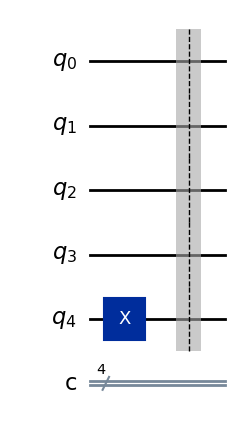

In [81]:
def paso_0(n):
    qc = QuantumCircuit(n+1,n)
    qc.x(n)
    qc.barrier()
    return qc

# Mostramos el circuito
paso_0(n).draw('mpl')

Paso 1: Obtén el estado
$$\vert \psi_1 \rangle = \frac{1}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1} \left(|0\rangle - |1 \rangle \right)\vert x\rangle $$

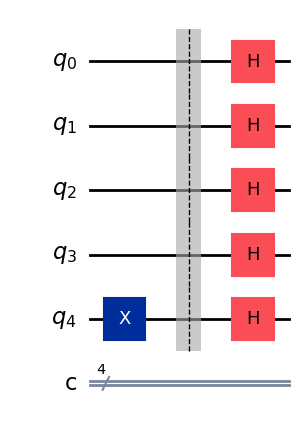

In [82]:
def paso_1(n):
    qc = paso_0(n)
    qc.h(range(n))
    qc.h(n)
    return qc

# Mostramos el circuito
paso_1(n).draw('mpl')

Paso 2: Añadimos el oráculo para obtener:

$$
\lvert \psi_2 \rangle  
= \frac{|0\rangle - |1\rangle}{\sqrt{2^{n+1}}}\sum_{x=0}^{2^n-1}(-1)^{f(x)}|x\rangle  
$$

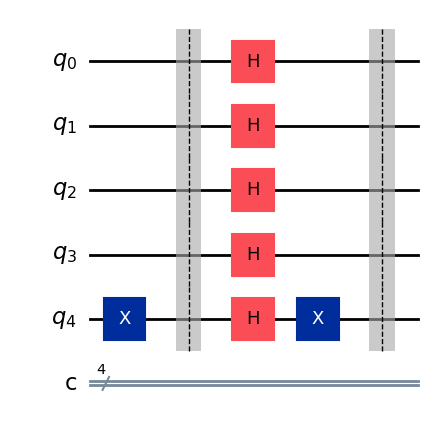

In [83]:
def paso_2(n, tipo_oraculo):
    qc = paso_1(n)
    qc = qc.compose(dj_oraculo(n, tipo_oraculo))
    qc.barrier()

    return qc

# Mostramos el circuito
paso_2(n, 0).draw('mpl')

Paso 3: Añade las últimas puertas H y la medida de los $n$ primeros cúbits.

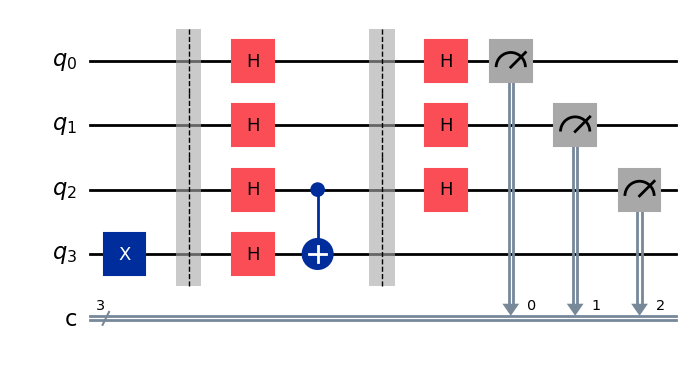

In [92]:
def paso_3(n, tipo_oraculo):
    qc = paso_2(n, tipo_oraculo)
    qc.h(range(n))
    qc.measure(range(n), range(n))
    return qc

# Selecciona un oráculo aleatorio
tipo_oraculo = 1
dj_circuito = paso_3(3, tipo_oraculo)
dj_circuito.draw('mpl')

Simulamos el circuito y obtenemos un histograma de la salida:

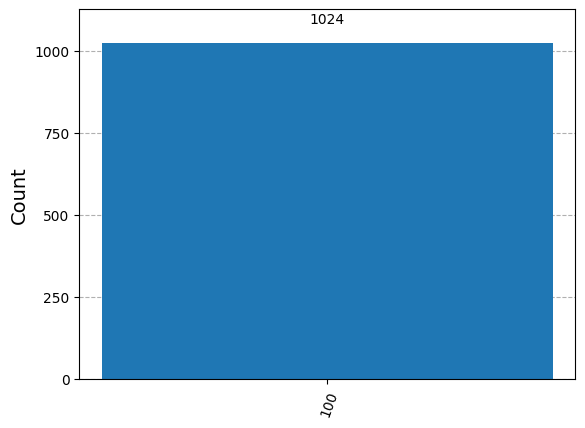

In [95]:
# Usamos Aer
sim = AerSimulator(method='automatic')
qc_obj = transpile(dj_circuito, sim)
result = sim.run(qc_obj, shots=1024).result()
salida = result.get_counts()
plot_histogram(salida)

Verifica que si el oráculo es constante, la salida es 0, y si es balanceado es $\ne 0$.

-----------------------------
-----------------------------
-----------------------------

In [96]:
#Algoritmo de Deutch-Jozsa juntito mejoricito

def algoritmo_deutch_jozsa(n, tipo_oraculo):
    qc.x(n)
    qc.barrier()

    qc = paso_0(n)
    qc.h(range(n))
    qc.h(n)

    qc = qc.compose(dj_oraculo(n, tipo_oraculo))
    qc.barrier()

    qc.h(range(n))
    qc.measure(range(n), range(n))

    return qc

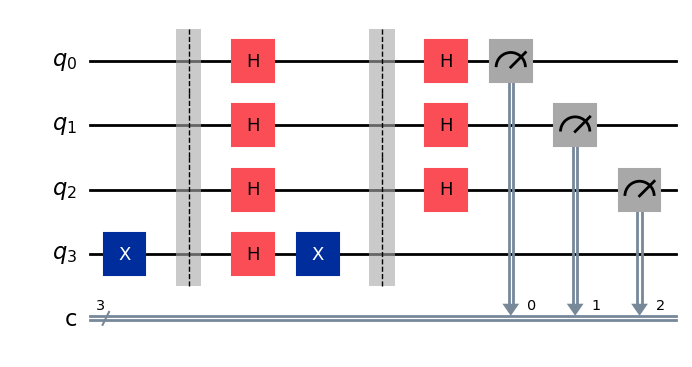

In [99]:
tipo_oraculo = 0
dj_circuito = paso_3(3, tipo_oraculo)
dj_circuito.draw('mpl')

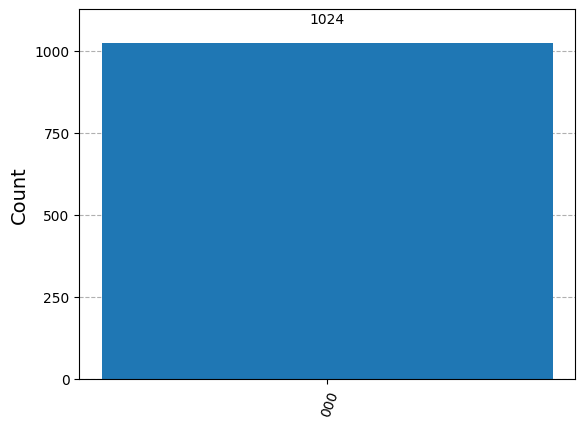

In [100]:
sim = AerSimulator(method='automatic')
qc_obj = transpile(dj_circuito, sim)
result = sim.run(qc_obj, shots=1024).result()
salida = result.get_counts()
plot_histogram(salida)